# PHYD57 final

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

In [2]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 1.0
        G = 1.0
        B = 1.0
    return (R,G,B,A)

$g = \rm mean(\cos(\theta))$, $\theta = \arccos(g)$

In [3]:
# read all output files and gather anisotropy data, convert them to angles in degrees
angles = []

for j in range(100):
    f = open('output{}.txt'.format(j), "r")
    lines = f.readlines()[1:]
    angles_temp = []
    
    for i in range(len(lines)):
        angle = np.arccos(float((lines[i].split())[3]))
        angles_temp.append(angle)
    angles.append(angles_temp)
    f.close()
    
angles = np.asarray(angles) * 57.2958  # convert radians to degrees

### Calculate the most intensive wavelength at a specific angle, with all the output files considered

In [4]:
radial = np.linspace(np.amin(angles), np.amax(angles), 200) # 200 radial sectors
wavelengths = np.arange(380, 750, step = 1.85)
max_intensive_wavelength = np.zeros(200)

In [5]:
intensity = np.zeros(200)
for k in range(200): # loop over all radial sectors
    for i in range(100): # loop over all the output files 
        for j in range(200): # loop over all wavelengths 
            if k == 0:
                if 0 < angles[i][j] < radial[k]:
                    intensity[j] += 1
            elif radial[k - 1] < angles[i][j] < radial[k]:
                intensity[j] += 1
    max_intensive_wavelength[k] = wavelengths[np.argmax(intensity)] # find the most intensive wavelength in a radial sector
    intensity = np.zeros(200)

    if k < 200*(90 - np.amax(angles))/90:
        max_intensive_wavelength[k] = np.NaN # region with no scattering light

In [6]:
clim=(380, 750)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

In [7]:
# invert array for plotting and expand to all radial directions
max_intensive_wavelength = np.tile(max_intensive_wavelength, (200, 1))

In [8]:
rad = np.linspace(0, 5, 200)
azm = np.linspace(0, 2 * np.pi, 200)
r, th = np.meshgrid(rad, azm)

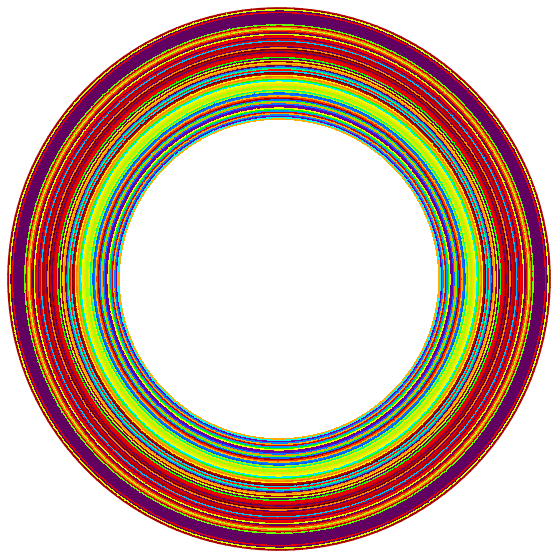

In [9]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(projection="polar")
plt.pcolormesh(th, r, max_intensive_wavelength, alpha = 1, cmap = spectralmap)
plt.axis('off')
plt.savefig("r_mu = 10um.pdf")
plt.show()